In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
import seaborn as sns
import pickle

read data

In [98]:
data = pd.read_csv('../../Data/cleaned_v2.csv')

# split data

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(data["Content_cleaned_v2"], data["Label"], test_size= 0.3, random_state= 42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((15911,), (15911,), (6820,), (6820,))

In [100]:
Y_train.value_counts()

Kinh te      2741
Giai tri     2270
Suc khoe     2175
Chinh tri    1870
Giao duc     1763
The thao     1642
Khoa hoc     1365
Phap luat    1056
Van hoa      1029
Name: Label, dtype: int64

# extract feature

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vec = TfidfVectorizer()
tf_idf_vec.fit(X_train)
vector_train = tf_idf_vec.transform(X_train)
vector_train

<15911x57131 sparse matrix of type '<class 'numpy.float64'>'
	with 2813267 stored elements in Compressed Sparse Row format>

In [102]:
a = tf_idf_vec.vocabulary_

In [103]:
# import numpy as np

# n = 20  # Number of top scores to retrieve
# top_indices = np.argsort(-vector_train.max(axis=0).toarray()[0])[:50]  # Indices of top N scores
# top_words = [word for word, index in tf_idf_vec.vocabulary_.items() if index in top_indices]
# top_scores = vector_train.max(axis=0).toarray()[0][top_indices]

# for word, score in zip(top_words, top_scores):
#     print(f"Word: {word}, Score: {score}")

In [104]:
dic = {}
x = " ".join(X_train).lower().split()
for i in x:
  if i in dic:
    dic[i] += 1
  else:
    dic[i] = 1
len(dic)

57131

In [105]:
cc = []

In [106]:
for i, v in enumerate(dic):
  if v not in a:
    cc.append(v)

In [107]:
len(cc)

0

# turning parameters

In [108]:
# param_grid = {'C': [1, 10, 100], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly']}
# # Set up score
# scoring = ['accuracy']
# # Set up the k-fold cross-validation
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# # Define grid search
# grid_search = GridSearchCV(estimator=svm.SVC(), 
#                            param_grid=param_grid, 
#                            scoring=scoring, 
#                            refit='accuracy', 
#                            n_jobs=-1, 
#                            cv=kfold, 
#                            verbose=0)
# # Fit grid search
# grid_result = grid_search.fit(vector_train, Y_train)
# # Print grid search summary
# grid_result.best_params_

In [109]:
# scores = [grid_search.cv_results_['split0_test_accuracy'], grid_search.cv_results_['split1_test_accuracy'], 
#          grid_search.cv_results_['split2_test_accuracy'], grid_search.cv_results_['split3_test_accuracy'], 
#          grid_search.cv_results_['split4_test_accuracy'], grid_search.cv_results_['split5_test_accuracy'], 
#          grid_search.cv_results_['split6_test_accuracy'], grid_search.cv_results_['split7_test_accuracy'], 
#          grid_search.cv_results_['split8_test_accuracy'], grid_search.cv_results_['split9_test_accuracy'], ]

# # plot the accuracy scores for each fold using a box plot
# max_scores = [max(x) for x in scores]
# plt.plot(max_scores)
# plt.xlabel('Validation Set')
# plt.ylabel('Accuracy')
# plt.title('Accuracy of each Validation Set in GridSearchCV')
# plt.show()

# modeling

In [110]:
classifier = svm.SVC(C= 10, gamma= 0.1, kernel= "rbf", probability=True)
# classifier.fit(vector_train, Y_train)

# predict

In [111]:
# vector_test = tf_idf_vec.transform(X_test)
# y_pred = classifier.predict(vector_test)

# report 

In [112]:
# # heatconmat(y_pred, Y_test)
# print(classification_report(y_pred, Y_test, digits=4))

In [113]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# def heatconmat(y_pred, y_test):
#   plt.figure(figsize=(10,8))
#   cnf_matrix = confusion_matrix(y_pred, y_test)
#   ax = sns.heatmap(cnf_matrix, annot=True, fmt='', cmap='Blues')
#   ax.xaxis.set_ticklabels(list(set(y_test)))
#   ax.yaxis.set_ticklabels(list(set(y_test)))
#   plt.show()
# heatconmat(y_pred, Y_test)

In [114]:
import sys
sys.path.insert(1, '../../FeatureEngineering/')
import preprocessing
preprocesser = preprocessing.Preprocesser()

In [115]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('preprocesser', preprocesser), ('vectorizer', tf_idf_vec), ('SVMModel', classifier)])
pipe.fit(X_train, Y_train)

Pipeline(steps=[('preprocesser', Preprocesser()),
                ('vectorizer', TfidfVectorizer()),
                ('SVMModel', SVC(C=10, gamma=0.1, probability=True))])

In [117]:
y_pred = pipe.predict(X_test)

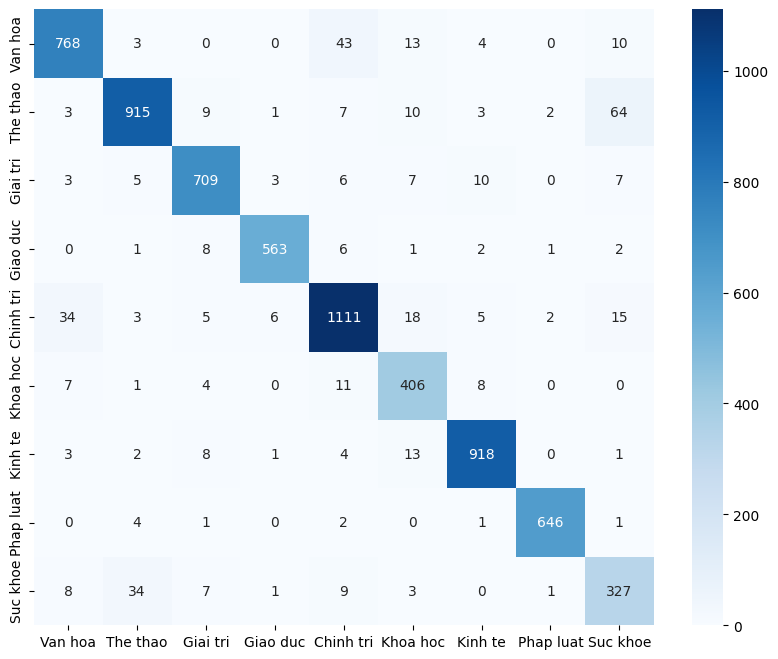

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def heatconmat(y_pred, y_test):
  plt.figure(figsize=(10,8))
  cnf_matrix = confusion_matrix(y_pred, y_test)
  ax = sns.heatmap(cnf_matrix, annot=True, fmt='', cmap='Blues')
  ax.xaxis.set_ticklabels(list(set(y_pred)))
  ax.yaxis.set_ticklabels(list(set(y_test)))
  plt.show()
heatconmat(y_pred, Y_test)

In [121]:
print(classification_report(y_pred, Y_test, digits=4))

              precision    recall  f1-score   support

   Chinh tri     0.9298    0.9132    0.9214       841
    Giai tri     0.9452    0.9024    0.9233      1014
    Giao duc     0.9441    0.9453    0.9447       750
    Khoa hoc     0.9791    0.9640    0.9715       584
     Kinh te     0.9266    0.9266    0.9266      1199
   Phap luat     0.8620    0.9291    0.8943       437
    Suc khoe     0.9653    0.9663    0.9658       950
    The thao     0.9908    0.9863    0.9885       655
     Van hoa     0.7658    0.8385    0.8005       390

    accuracy                         0.9330      6820
   macro avg     0.9232    0.9302    0.9263      6820
weighted avg     0.9344    0.9330    0.9334      6820



In [124]:
pickle.dump(pipe, open('svm.sav', 'wb'))

# check 

In [64]:
arr_wrong = []
for i, v in enumerate(y_pred):
  if v != np.array(Y_test)[i]:
    arr_wrong.append(i)

In [65]:
arr_true = []
for i, v in enumerate(y_pred):
  if v == np.array(Y_test)[i]:
    arr_true.append(i)

In [66]:
l = pd.Series(sorted([len(x.split()) for x in np.array(X_test)[arr_wrong]]))

In [67]:
t = pd.Series(sorted([len(x.split()) for x in np.array(X_test)[arr_true]]))

In [68]:
len(l), len(l[l.values > 300])

(229, 101)

In [69]:
np.mean(t)

268.0692

In [70]:
np.mean(l)

280.17903930131007

<AxesSubplot:>

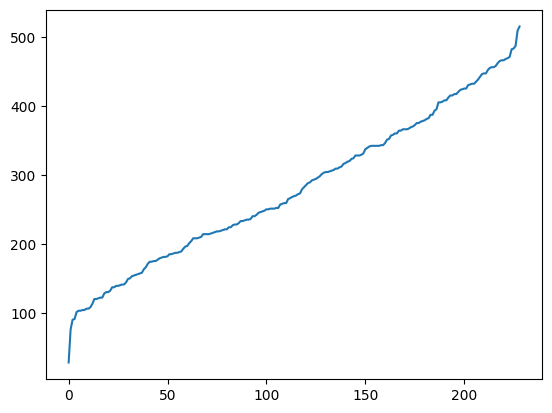

In [71]:
l.plot()

<AxesSubplot:>

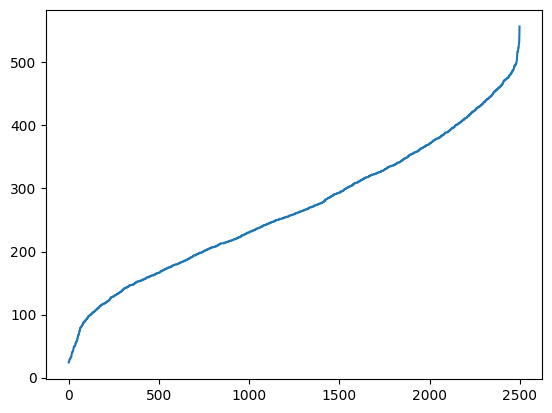

In [72]:
t.plot()

In [73]:
np.array(X_test)[arr_wrong][2]

'bà park_mihyung trưởng đại_diện iom nhấn_mạnh điều hội_thảo tham_vấn chương_trình hoạt_động hợp_tác lĩnh_vực di_cư lao_động giai_đoạn hội_thảo do iom cục quản_lý lao_động ngoài lđtb xh phối_hợp tổ_chức tham_dự đại_diện sở lđtb xh tỉnh thành_phố số lao_động làm_việc nước_ngoài hội_thảo tham_vấn cấp mang cơ_hội bên đánh_giá hiệu_quả hoạt_động hợp_tác hiện_tại giữa iom cục quản_lý lao_động ngoài đồng_thời thảo_luận ưu_tiên hoạt_động hợp_tác sắp tới lĩnh_vực di_cư lao_động giai_đoạn khai_mạc hội_thảo dũng phó_cục_trưởng cục quản_lý lao_động ngoài đánh_giá chương_trình hoạt_động hợp_tác triển_khai iom bao_gồm hỗ_trợ kỹ_thuật tài_chính hoạt_động xây_dựng phổ_biến luật nâng năng_lực cán_bộ nhận_thức dân di_cư lao_động an_toàn bảo_vệ lao_động đi làm_việc nước_ngoài bà park_mihyung nhấn_mạnh cam_kết iom hợp_tác chặt_chẽ chính_phủ nhằm thúc_đẩy phát_triển kỹ_năng lao_động di_cư chỉ tập_trung mang cơ_hội việc_làm tốt mà nâng trải nghiệm di_cư họ trưởng đại_diện iom đánh_giá tạo môi_trường thuận_

In [74]:
np.array(y_pred)[arr_wrong][2]

'Kinh te'

In [75]:
np.array(Y_test)[arr_wrong][2]

'Chinh tri'

In [76]:
check = pd.DataFrame({"content": np.array(X_test)[arr_wrong], "predicted": np.array(y_pred)[arr_wrong], "true label": np.array(Y_test)[arr_wrong]})

In [77]:
check['lennn'] = check['content'].apply(lambda x: len(x.split()))

In [78]:
check

,content,predicted,true label,lennn
0,cuộc họp hội_đồng thẩm_định kết_quả rà_soát ho...,Chinh tri,Kinh te,423
1,tham_dự lễ trao giải bà bùi_thị minh_hoài bí_t...,Kinh te,Chinh tri,298
2,bà park_mihyung trưởng đại_diện iom nhấn_mạnh ...,Kinh te,Chinh tri,251
3,nhung kết_hôn chị giáo_viên mầm_non chị nhung ...,Giao duc,Phap luat,339
4,indian_express đây cảnh_báo thứ ba vòng bảy th...,Khoa hoc,Suc khoe,218
...,...,...,...,...
224,chiều kíp con nhót mót chồng buổi gặp_gỡ truyề...,Giai tri,Van hoa,307
225,bốn ngôi đền thăng_long_tứ trấn bao_gồm đền bạ...,Van hoa,Giao duc,259
226,galaxy_cinema dự_định ứng_dụng công_nghệ trình...,Khoa hoc,Giai tri,144
227,buổi làm_việc giữa đảng_đoàn quốc_hội ban thườ...,Chinh tri,Kinh te,309


In [79]:
len(check)

229

In [80]:
data[data["Content_cleaned_v2"] == np.array(X_test)[arr_wrong][4]].iloc[0].Link

'https://vietnamnet.vn/who-neu-ten-mot-loai-siro-ho-nhiem-doc-2137666.html'